This December I am celebrating 3 months anniversary with Python. On the last weekend of September I participated in PyLove workshop which was my first ever encounter with programming. Many lessons, few books and an online course later I dared to download my first dataset found on Kaggle and play around with it. I chose [Visa Free Traevl by Ctizenship 2016, Inequality in world citizenship](https://www.kaggle.com/sdorius/visafree2016) and added more information using [Countries REST API](https://restcountries.eu/).

The problem I wanted to tackle was to measure the persisting inequality and see whether countries with similar rank share some characteristics with each other. 

##  #1 DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%matplotlib inline
sns.set()

In [2]:
# Loading Kaggle data set
visa = pd.read_csv('VisaFreeScore.csv')

In [3]:
visa.head()

,country,visarank,visafree,visaonarrive,visawelc
0,Germany,1.0,157.0,117.0,84.0
1,Sweden,1.0,157.0,117.0,84.0
2,Finland,2.0,156.0,117.0,85.0
3,France,2.0,156.0,116.0,84.0
4,Italy,2.0,156.0,117.0,84.0


In [4]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
country         199 non-null object
visarank        199 non-null float64
visafree        199 non-null float64
visaonarrive    199 non-null float64
visawelc        199 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Loading country data from open API to a json file
countries = requests.get('https://restcountries.eu/rest/v2/all')
countries = countries.json()

In [6]:
# Creating empty lists of information I chose and filling them with data from API
name = []
borders = []
region = []
latlng = []
area = []
population = []
gini = []

x = 0
for country in countries:
    name.append(countries[x]['name'])
    borders.append(countries[x]['borders'])
    region.append(countries[x]['region'])
    latlng.append(countries[x]['latlng'])
    area.append(countries[x]['area'])
    population.append(countries[x]['population'])
    gini.append(countries[x]['gini'])
    x += 1

In [7]:
# Change from list of borders into number of shared boarders for each country
y = 0 
for border in borders:
    borders[y] = len(border)
    y += 1

In [8]:
# I want to separate latlng column, but couldn't simply loop through it as it has some empty lists. 
# Finding where latlng doesn't contain 2 values
for value in latlng:
    if len(value) == 0:
        print(latlng.index(value))
    elif len(value) == 1:
        print(latlng.index(value))

33


In [9]:
latlng[33] = ['', '']

In [10]:
lat = []
lng = []
z = 0
for value in latlng:
    lat.append(latlng[z][0])
    lng.append(latlng[z][1])
    z += 1

In [11]:
# Creating Pandas DataFrame from API data
df_countries = pd.DataFrame(
    {'country': name,
     'borders': borders,
     'region': region,
     'lat': lat,
     'lng': lng,
     'area': area,
     'population': population,
     'gini':gini
    })

In [12]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
area          240 non-null float64
borders       250 non-null int64
country       250 non-null object
gini          153 non-null float64
lat           250 non-null object
lng           250 non-null object
population    250 non-null int64
region        250 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 15.7+ KB


In [13]:
# Merging two datasets into one table on country row
vc = pd.merge(visa, df_countries, how='inner', on='country')
vc = vc.set_index('country')
vc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, Germany to Afghanistan
Data columns (total 11 columns):
visarank        178 non-null float64
visafree        178 non-null float64
visaonarrive    178 non-null float64
visawelc        178 non-null float64
area            178 non-null float64
borders         178 non-null int64
gini            140 non-null float64
lat             178 non-null object
lng             178 non-null object
population      178 non-null int64
region          178 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 16.7+ KB


## #2 EXPLORATORY ANALYSIS

In [14]:
vc.head(10)

,visarank,visafree,visaonarrive,visawelc,area,borders,gini,lat,lng,population,region
country,,,,,,,,,,,
Germany,1.0,157.0,117.0,84.0,357114.0,9,28.3,51,9,81770900,Europe
Sweden,1.0,157.0,117.0,84.0,450295.0,2,25.0,62,15,9894888,Europe
Finland,2.0,156.0,117.0,85.0,338424.0,3,26.9,64,26,5491817,Europe
France,2.0,156.0,116.0,84.0,640679.0,8,32.7,46,2,66710000,Europe
Italy,2.0,156.0,117.0,84.0,301336.0,6,36.0,42.8333,12.8333,60665551,Europe
Spain,2.0,156.0,115.0,84.0,505992.0,5,34.7,40,-4,46438422,Europe
Switzerland,2.0,156.0,116.0,84.0,41284.0,5,33.7,47,8,8341600,Europe
Belgium,3.0,155.0,115.0,84.0,30528.0,4,33.0,50.8333,4,11319511,Europe
Denmark,3.0,155.0,116.0,83.0,43094.0,1,24.0,56,10,5717014,Europe


In [15]:
vc.tail(10)

,visarank,visafree,visaonarrive,visawelc,area,borders,gini,lat,lng,population,region
country,,,,,,,,,,,
Sri Lanka,85.0,38.0,14.0,181.0,65610.0,1,40.3,7,81,20966000,Asia
Bangladesh,86.0,37.0,16.0,174.0,147570.0,2,32.1,24,90,161006790,Asia
Ethiopia,86.0,37.0,6.0,41.0,1104300.0,6,29.8,8,38,92206005,Africa
Libya,86.0,37.0,8.0,3.0,1759540.0,6,NaN,25,17,6385000,Africa
Sudan,86.0,37.0,5.0,10.0,1886068.0,7,35.3,15,30,39598700,Africa
South Sudan,87.0,36.0,7.0,5.0,619745.0,6,45.5,7,30,12131000,Africa
Somalia,89.0,32.0,5.0,0.0,637657.0,3,NaN,10,49,11079000,Africa
Iraq,90.0,31.0,5.0,1.0,438317.0,6,30.9,33,44,37883543,Asia
Pakistan,91.0,28.0,6.0,9.0,881912.0,4,30.0,30,70,194125062,Asia


In [16]:
vc.describe()

,visarank,visafree,visaonarrive,visawelc,area,borders,gini,population
count,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,140.000000,1.780000e+02
mean,46.432584,90.410112,56.185393,87.185393,7.015627e+05,3.191011,40.204286,3.834817e+07
std,28.096453,41.992269,38.744774,57.513392,1.992460e+06,2.652688,9.451663,1.461851e+08
min,1.000000,25.000000,3.000000,0.000000,2.020000e+00,0.000000,24.000000,1.008400e+04
25%,18.000000,53.250000,22.000000,51.000000,2.302450e+04,1.000000,33.375000,1.822321e+06
50%,51.500000,74.500000,40.500000,84.000000,1.125570e+05,3.000000,38.950000,7.704000e+06
75%,71.750000,137.000000,98.750000,109.500000,5.015190e+05,5.000000,47.000000,2.330498e+07
max,92.000000,157.000000,118.000000,198.000000,1.712444e+07,15.000000,65.800000,1.377422e+09


* First look at the data shows that top 10 countries are dominated by Europe, whereas the lowest rank countries represent Asia and Africa.


* The lowest rank is 92 which means that some of 178 countries share the same rank. 


* Gini coefficient is the only variable with missing values.

In [17]:
vc[['visarank', 'visafree', 'visaonarrive', 'visawelc']].corr()

,visarank,visafree,visaonarrive,visawelc
visarank,1.000000,-0.996567,-0.990366,-0.125559
visafree,-0.996567,1.000000,0.995280,0.117318
visaonarrive,-0.990366,0.995280,1.000000,0.131792
visawelc,-0.125559,0.117318,0.131792,1.000000


* Visa rank is calculated on the basis of number of visa free destinations and possibility of acquiring visa on arrive. Therefore correlation between those 3 columns is almost 1.


* Visawelc - number of countries that are not required to have a visa while visiting shows almost no connection with the rank.

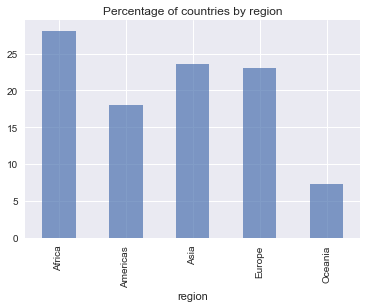

In [18]:
((vc['visarank'].groupby(by=vc['region']).count()/178)*100).plot(kind='bar', alpha=0.7)
plt.title('Percentage of countries by region');

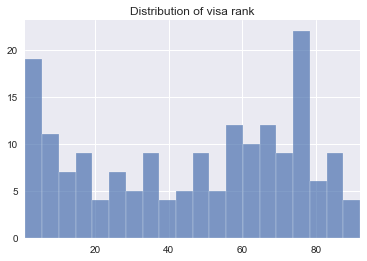

In [19]:
plt.hist(vc['visarank'], bins=20, ec='white', alpha=0.7)
plt.title('Distribution of visa rank')
plt.xlim(vc['visarank'].min(), vc['visarank'].max());

* The lower the visa rank, the higher freedom of travel citizens of a country have. This histogram shows inequality in free travelling. There are two local max values - for countries with highest degree of freedom to travel, and for countries ranking just under 80, meaning many restrictions by visa requirements. 

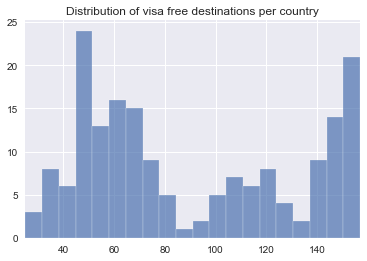

In [20]:
plt.hist(vc['visafree'], bins=20, ec='white', alpha=0.7)
plt.title('Distribution of visa free destinations per country')
plt.xlim(vc['visafree'].min(), vc['visafree'].max());

* Distribution of visa free destinations allows to put a measure on inequality shown on the previous chart. Highest degree of freedom to travel means being able to visit almost 160 countries all over the world with no formal requirements. Countries with most restricions can travel to only about one third of this number.

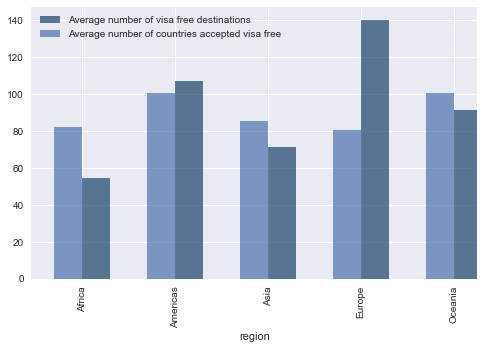

In [21]:
fig = plt.figure(figsize=(8,5))
fig.add_subplot(111)

vc['visafree'].groupby(by=vc['region']).mean().plot(kind='bar', color='#19436B', position=0, width=0.3, alpha=0.7, 
                                                    label = 'Average number of visa free destinations')
vc['visawelc'].groupby(by=vc['region']).mean().plot(kind='bar', position=1, width=0.3, alpha=0.7,
                                                   label = 'Average number of countries accepted visa free')
plt.legend();

* Africa and Asia are regions, where citizens of each country have lowest number of visa free destinations.


* European citizens have strong advantage over other regions.


* At the same time Europe is a region that on average accepts the lowest number of visitors without visa. 


* Americas' citizens also can travel visa free more than they offer visa free entries, however the difference is visibly smaller.


* All the other regions have an opposite ratio and the biggest difference between those values persists among African countries.

In [22]:
vc1 = pd.DataFrame()
vc1['welcome_count'] = vc['visawelc'].groupby(by=vc['region']).sum()
vc1['free_count'] = vc['visafree'].groupby(by=vc['region']).sum()
vc1['free_welcome_ratio'] = vc1['free_count'] / vc1['welcome_count'] 
vc1

,welcome_count,free_count,free_welcome_ratio
region,,,
Africa,4106.0,2735.0,0.666098
Americas,3226.0,3426.0,1.061996
Asia,3583.0,2999.0,0.837008
Europe,3296.0,5742.0,1.742112
Oceania,1308.0,1191.0,0.910550


* Free_welcome_ratio columns shows how many countries can an average citizen of a region travel visa free for welcoming one country without such requirement.

In [23]:
vc[vc['visawelc']==0]

,visarank,visafree,visaonarrive,visawelc,area,borders,gini,lat,lng,population,region
country,,,,,,,,,,,
Turkmenistan,74.0,51.0,14.0,0.0,488100.0,4,40.8,40,60,4751120,Asia
Somalia,89.0,32.0,5.0,0.0,637657.0,3,NaN,10,49,11079000,Africa
Afghanistan,92.0,25.0,3.0,0.0,652230.0,6,27.8,33,65,27657145,Asia


In [24]:
vc[vc['visawelc']==vc['visawelc'].max()]

,visarank,visafree,visaonarrive,visawelc,area,borders,gini,lat,lng,population,region
country,,,,,,,,,,,
Seychelles,24.0,123.0,91.0,198.0,452.0,0,65.8,-4.58333,55.6667,91400,Africa
Samoa,35.0,109.0,76.0,198.0,2842.0,0,NaN,-13.5833,-172.333,194899,Oceania
Timor-Leste,47.0,83.0,49.0,198.0,14874.0,1,31.9,-8.83333,125.917,1167242,Asia
Tuvalu,51.0,75.0,43.0,198.0,26.0,0,NaN,-8,178,10640,Oceania
Uganda,67.0,58.0,30.0,198.0,241550.0,5,44.3,1,32,33860700,Africa
Mauritania,71.0,54.0,23.0,198.0,1030700.0,4,40.5,20,-12,3718678,Africa
Togo,72.0,53.0,22.0,198.0,56785.0,3,34.4,8,1.16667,7143000,Africa
Cambodia,75.0,50.0,18.0,198.0,181035.0,3,37.9,13,105,15626444,Asia
Guinea-Bissau,75.0,50.0,22.0,198.0,36125.0,2,35.5,12,-15,1547777,Africa


* 13 countries welcome all other without visa requirements, 3 countries allow no one to enter visa free.

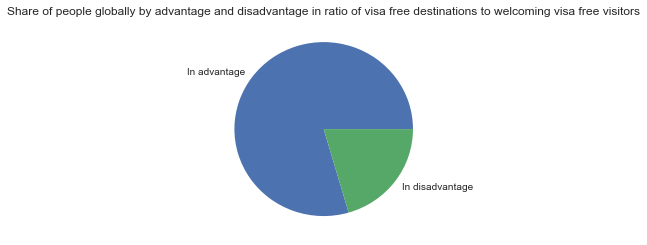

In [25]:
plt.figure(figsize=(4,4))
vc['population'].groupby(np.where(vc['visafree']>vc['visawelc'], 'In advantage', 
                                  'In disadvantage')).sum().plot(kind='pie', label='')
plt.title('Share of people globally by advantage and disadvantage in ratio of visa free destinations to welcoming visa free visitors');

* Number of citizens of countries that are in discriminating travelling agreements is approaching a quarter of population globally.

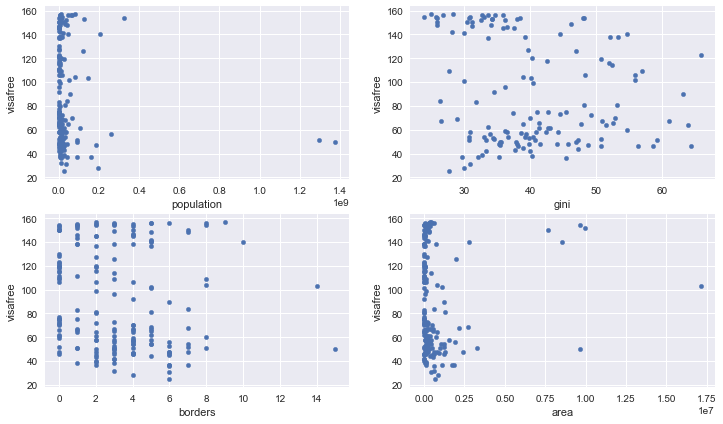

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7), )
vc[['population', 'visafree']].plot(ax = axes[0,0], x='population', y='visafree', kind='scatter')
vc[['gini', 'visafree']].plot(ax = axes[0,1], x='gini', y='visafree', kind='scatter')
vc[['borders', 'visafree']].plot(ax = axes[1,0], x='borders', y='visafree', kind='scatter')
vc[['area', 'visafree']].plot(ax = axes[1,1], x='area', y='visafree', kind='scatter');

The above diagrams check for patterns between number of visa free destinations and country characteristics.
* There seems to be little conection between population size and visa free destinations.


* Gini coefficient values are scattered, however there are two visible groups: gini score between 25 and 40 is paired with high number of visa free destinations (between 140 and 160 countries. Gini score between 30 and 45 is paired with lower number of visa free destinations (between 40 and 70 countries).


* For different numbers of borders, number of visa free destinations tends to have full spectrum from very low to very high values.


* There seems to be some pattern between area and visa free destinations. Ignoring extreme area values, with bigger area number of visa free destinations tends to cummulate around 30 to 70 countries.

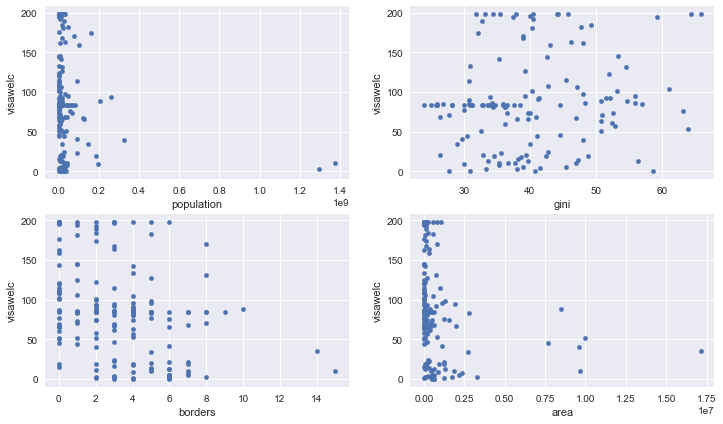

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
vc[['population', 'visawelc']].plot(ax = axes[0,0], x='population', y='visawelc', kind='scatter')
vc[['gini', 'visawelc']].plot(ax = axes[0,1], x='gini', y='visawelc', kind='scatter')
vc[['borders', 'visawelc']].plot(ax = axes[1,0], x='borders', y='visawelc', kind='scatter')
vc[['area', 'visawelc']].plot(ax = axes[1,1], x='area', y='visawelc', kind='scatter');

The above diagrams check for patterns between number of welcoming visa free visitors and country characteristics.
* Population again seems not to show any strong pattern against welcoming visa free visitors.


* Low Gini coefficient (up to 30) is connected with visibly lower number of accepting visitors with no visa (around 80 countries). Only with Gini score higher than 30 we can observe full spectrum of visawelc values.


* It's difficult to observe a strong pattern between visawelc and number of borders. However interestingly, high numbers of allowing visa free visitors is more common for up to 2 shared borders. For higher values there are only single countries with such result.


* Bigger area countries tend to allow up to 100 countries' citizents with no visa requirement.
